## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


In [ ]:
#This project was an exercise in multiple linear regression, using the Housing 
#dataset from King County. The process follows the OSEM-I Data Science work flow.

In [ ]:
#O: Obtain Data

In [ ]:
##The first step is to upload the data and load the numpy/pandas libraries, then take a 
##look at what the dataframe looks like, inspect column names

In [1]:
import numpy as np
import pandas as pd
kchouse = pd.read_csv('data/kc_house_data.csv')
kchouse.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [2]:
kchouse.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [ ]:
#I dropped unnecessary columns

In [3]:
kc_new = kchouse.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15'], axis=1)
kc_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 1.8 MB


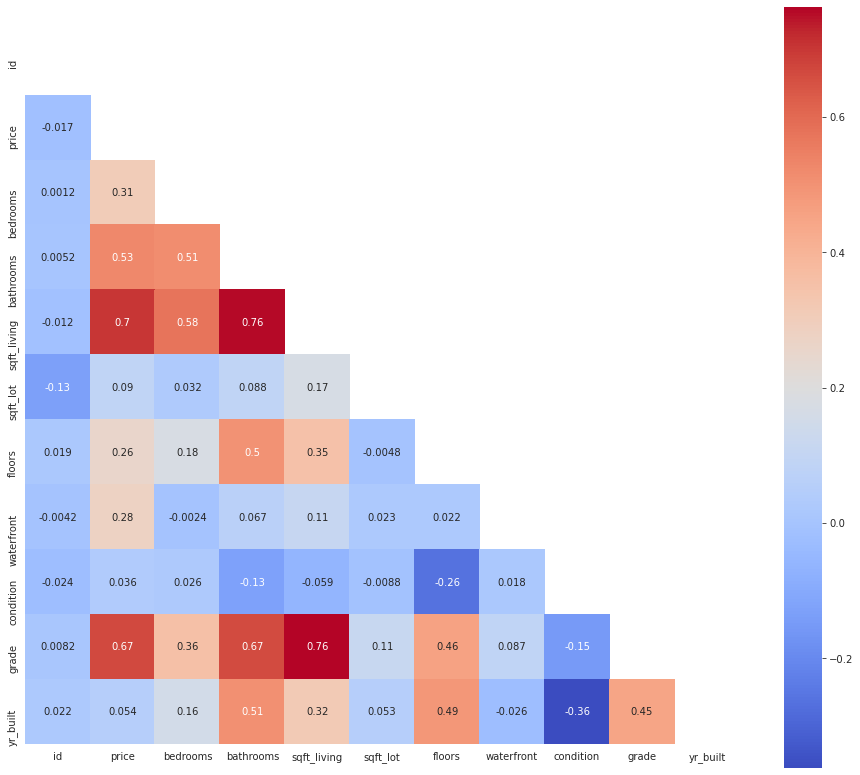

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt
corr = kc_new.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

with sns.axes_style("white"):

    f, ax = plt.subplots(figsize=(16, 14))

    ax = sns.heatmap(corr, mask=mask, square=True, annot = True, cmap = 'coolwarm')

In [ ]:
#The next steps, Scrub and Explore, do mean separate things, but tend go hand in 
#hand. As we Explore more representations of our data, we gain more particular 
#insight into its characteristics. 

In [ ]:
#Look at the basic stats of the variables

In [4]:
kc_new.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000


In [ ]:
#some notes: # Mean price is $540,296.57 
             # std $367368.14
             # min $78,000.0 
             # 25% $322,000.0
             # 50% $450,000.0,
             # 75% $645000.0
             # max $7,700,000.0

In [ ]:
#I noticed there were null values in the waterfront column. The values 1 and 0 
#represent if the property is on a waterfront or not. I'm making and educated 
#assumption that that means there is no waterfront, so I changed the null values 
#to a 0.

In [59]:
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False        False     False   False       False      False  False       19221
                                                                  True        False      False  False        2376
dtype: int64

In [19]:
kc_new['waterfront'] = kc_new['waterfront'].fillna(0.0)
kc_new.isna().value_counts()

id     price  bedrooms  bathrooms  sqft_living  sqft_lot  floors  waterfront  condition  grade  yr_built
False  False  False     False      False        False     False   False       False      False  False       21420
dtype: int64

In [4]:
#I wanted to make sure there was one entry per ID, and drop any double-entries

In [20]:
kc_new['id'].value_counts()

2911700010    1
5450300010    1
5104511600    1
1160000115    1
686530110     1
             ..
2115510470    1
2922701305    1
6071600370    1
526059224     1
1777500160    1
Name: id, Length: 21420, dtype: int64

In [21]:
kc_new.drop_duplicates(subset = 'id', inplace = True)

In [22]:
kc_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21420 entries, 0 to 21596
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21420 non-null  int64  
 1   price        21420 non-null  float64
 2   bedrooms     21420 non-null  int64  
 3   bathrooms    21420 non-null  float64
 4   sqft_living  21420 non-null  int64  
 5   sqft_lot     21420 non-null  int64  
 6   floors       21420 non-null  float64
 7   waterfront   21420 non-null  float64
 8   condition    21420 non-null  int64  
 9   grade        21420 non-null  int64  
 10  yr_built     21420 non-null  int64  
dtypes: float64(4), int64(7)
memory usage: 2.0 MB


In [ ]:
#I created a correlation heatmap to ID any potential independent variables that
#exhibit multicolinearity, as that would violate one of the necessary assumptions
#we need for Linear Regression

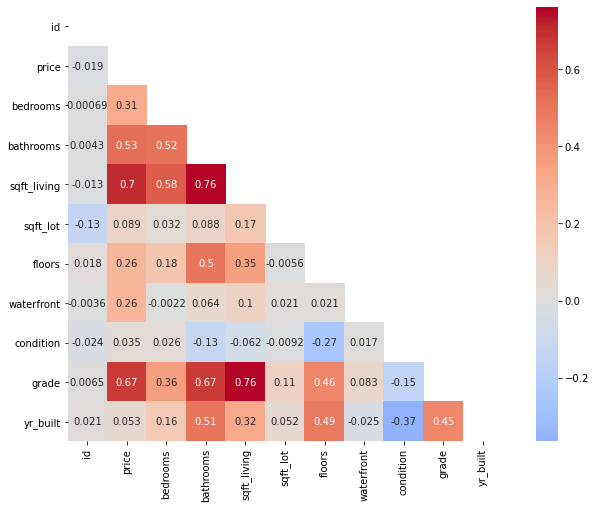

In [31]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
corr = kc_new.corr()

f, ax = plt.subplots(figsize=(12, 8))

ax = sns.heatmap(corr, mask=mask, center = 0, square=True, annot = True, cmap = 'coolwarm')


In [32]:
df = kc_new.corr().abs().stack().reset_index().sort_values(0, ascending=False)

# zip the variable name columns (Which were only named level_0 and level_1 by default) in a new column named "pairs"
df['pairs'] = list(zip(df.level_0, df.level_1))

# set index to pairs
df.set_index(['pairs'], inplace = True)

#d rop level columns
df.drop(columns=['level_1', 'level_0'], inplace = True)

# rename correlation column as cc rather than 0
df.columns = ['cc']

# drop duplicates. This could be dangerous if you have variables perfectly correlated with variables other than themselves.
# for the sake of exercise, kept it in.
df.drop_duplicates(inplace=True)

In [33]:
df[(df.cc>.75) & (df.cc <1)]

,cc
pairs,
"(grade, sqft_living)",0.762477
"(sqft_living, bathrooms)",0.755522


In [ ]:
### big ol scatter matrix to help discern between continuous/categorical variables

array([[<AxesSubplot:xlabel='id', ylabel='id'>,
        <AxesSubplot:xlabel='price', ylabel='id'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='id'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='id'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='id'>,
        <AxesSubplot:xlabel='floors', ylabel='id'>,
        <AxesSubplot:xlabel='waterfront', ylabel='id'>,
        <AxesSubplot:xlabel='condition', ylabel='id'>,
        <AxesSubplot:xlabel='grade', ylabel='id'>,
        <AxesSubplot:xlabel='yr_built', ylabel='id'>],
       [<AxesSubplot:xlabel='id', ylabel='price'>,
        <AxesSubplot:xlabel='price', ylabel='price'>,
        <AxesSubplot:xlabel='bedrooms', ylabel='price'>,
        <AxesSubplot:xlabel='bathrooms', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_living', ylabel='price'>,
        <AxesSubplot:xlabel='sqft_lot', ylabel='price'>,
        <AxesSubplot:xlabel='floors', ylabel='price'>,
        <AxesSubplot

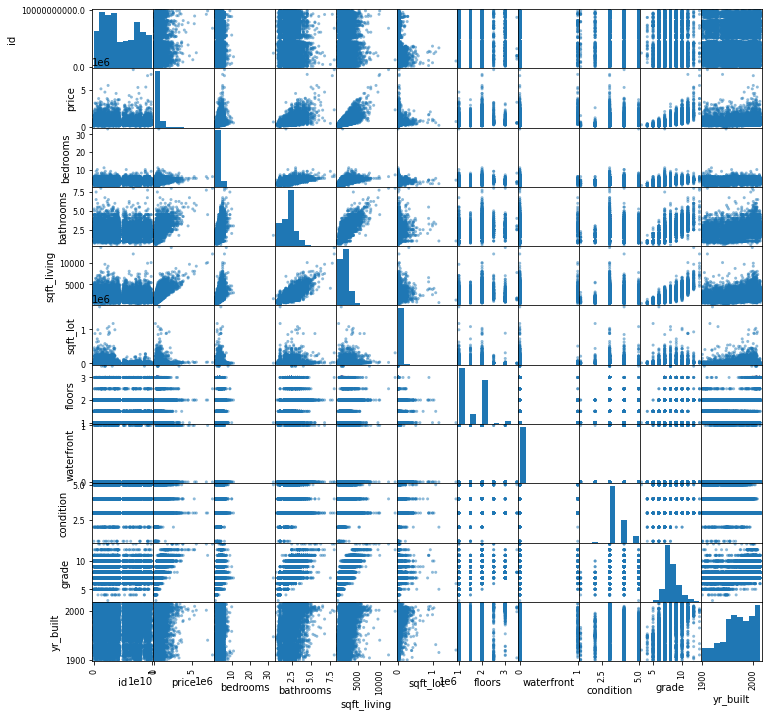

In [67]:
pd.plotting.scatter_matrix(kc_new, figsize=[12,12])

In [ ]:
### Check for outliers ###

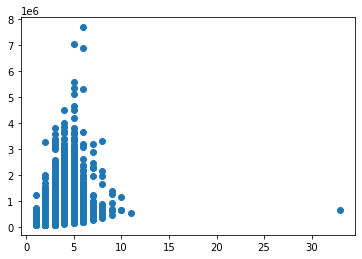

In [34]:
plt.scatter(x = kc_new['bedrooms'], y = kc_new['price'])

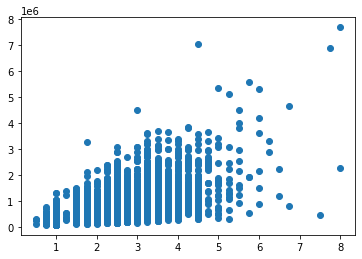

In [35]:
plt.scatter(x = kc_new['bathrooms'], y = kc_new['price'])


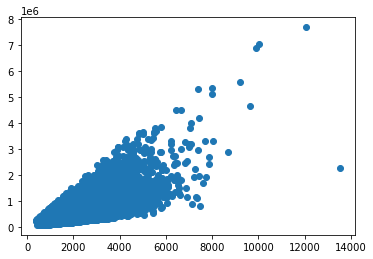

In [36]:
plt.scatter(x = kc_new['sqft_living'], y = kc_new['price'])

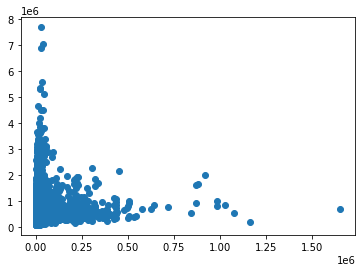

In [37]:
plt.scatter(x = kc_new['sqft_lot'], y = kc_new['price'])


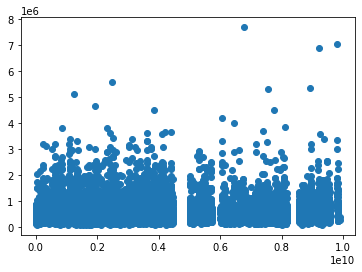

In [38]:
plt.scatter(x = kc_new['id'], y = kc_new['price'])


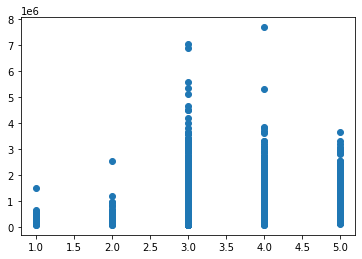

In [39]:
plt.scatter(x = kc_new['condition'], y = kc_new['price'])

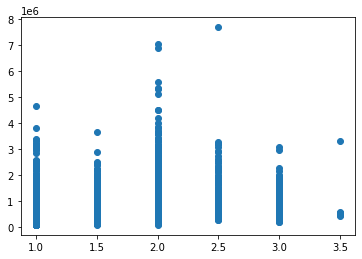

In [40]:
plt.scatter(x = kc_new['floors'], y = kc_new['price'])


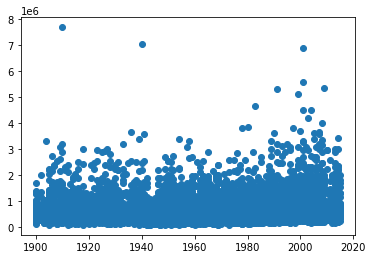

In [41]:
plt.scatter(x = kc_new['yr_built'], y = kc_new['price'])


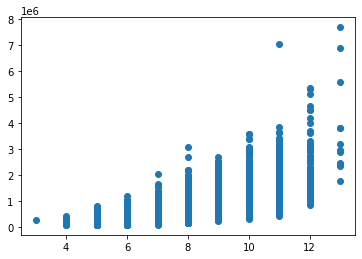

In [42]:
plt.scatter(x = kc_new['grade'], y = kc_new['price'])


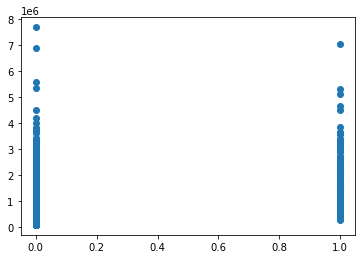

In [43]:
plt.scatter(x = kc_new['waterfront'], y = kc_new['price'])

###****** outlier elimination *******###

###********************************###

In [67]:
continuous = ['price',  'sqft_lot', 'sqft_living']
categoricals = ['waterfront', 'condition', 'grade',  'yr_built','bathrooms', 'floors','bedrooms']
kccat = kc_new[categoricals]
kccon = kc_new[continuous]

In [65]:
kccat = kccat.set_index(kc_new['id'])
kccon = kccon.set_index(kc_new['id'])

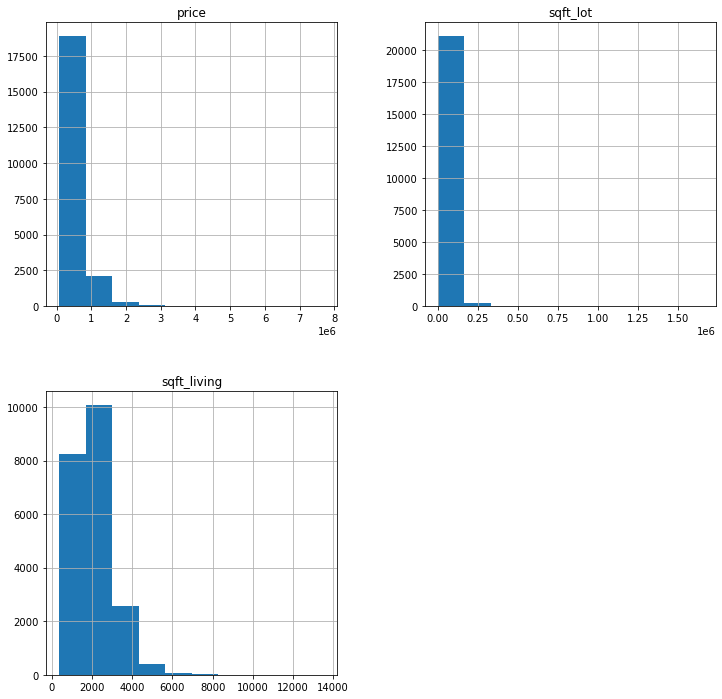

In [68]:
kccon.hist(figsize = [12,12]);

In [69]:
#### doing an initial model just for funsies ####
from statsmodels.formula.api import ols

outcome = 'price'
predictors = kc_new.drop('price', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_new).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.646
Model:                            OLS   Adj. R-squared:                  0.646
Method:                 Least Squares   F-statistic:                     3908.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:35:48   Log-Likelihood:            -2.9378e+05
No. Observations:               21420   AIC:                         5.876e+05
Df Residuals:                   21409   BIC:                         5.877e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    6.688e+06    1.3e+05     51.280      0.000    6.43e+06    6.94e+06
id          -1.552e-06   5.25e-07     -2.955      0.003   -2.58e-06   -5.23e-07
bedrooms    -4.296e+04   2064.444    -20.808      0.000    -4.7e+04   -3.89e+04
bathrooms    5.152e+04   3472.880     14.835      0.000    4.47e+04    5.83e+04
sqft_living   176.9585      3.315     53.380      0.000     170.461     183.456
sqft_lot       -0.2569      0.037     -6.909      0.000      -0.330      -0.184
floors        2.11e+04   3474.091      6.074      0.000    1.43e+04    2.79e+04
waterfront    7.55e+05   1.84e+04     41.078      0.000    7.19e+05    7.91e+05
condition    1.933e+04   2507.177      7.710      0.000    1.44e+04    2.42e+04
grade        1.304e+05   2167.181     60.167      0.000    1.26e+05    1.35e+05
yr_built    -3840.9998     67.041    -57.293      0.000   -3972.406   -3709.594
==============================================================================
Omnibus:                    15771.211   Durbin-Watson:                   1.983
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1013819.083
Skew:                           2.948   Prob(JB):                         0.00
Kurtosis:                      36.184   Cond. No.                     4.72e+11
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.72e+11. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
# log and normalize features
log_names = [f'{column}_log' for column in kccon.columns]

kccon_log = np.log(kccon)
kccon_log.columns = log_names

log_names

['price_log', 'sqft_lot_log', 'sqft_living_log']

In [84]:
kccon_log

,price_log,sqft_lot_log,sqft_living_log
id,,,
7129300520,12.309982,8.639411,7.073270
6414100192,13.195614,8.887653,7.851661
5631500400,12.100712,9.210340,6.646391
2487200875,13.311329,8.517193,7.580700
1954400510,13.142166,8.997147,7.426549
...,...,...,...
263000018,12.793859,7.030857,7.333023
6600060120,12.899220,8.667852,7.745003
1523300141,12.904459,7.207860,6.927558


In [71]:
def normalize(feature):
    return (feature - feature.mean()) / feature.std()

kc_log_norm = kccon_log.apply(normalize)

array([[<AxesSubplot:title={'center':'price_log'}>,
        <AxesSubplot:title={'center':'sqft_lot_log'}>],
       [<AxesSubplot:title={'center':'sqft_living_log'}>, <AxesSubplot:>]],
      dtype=object)

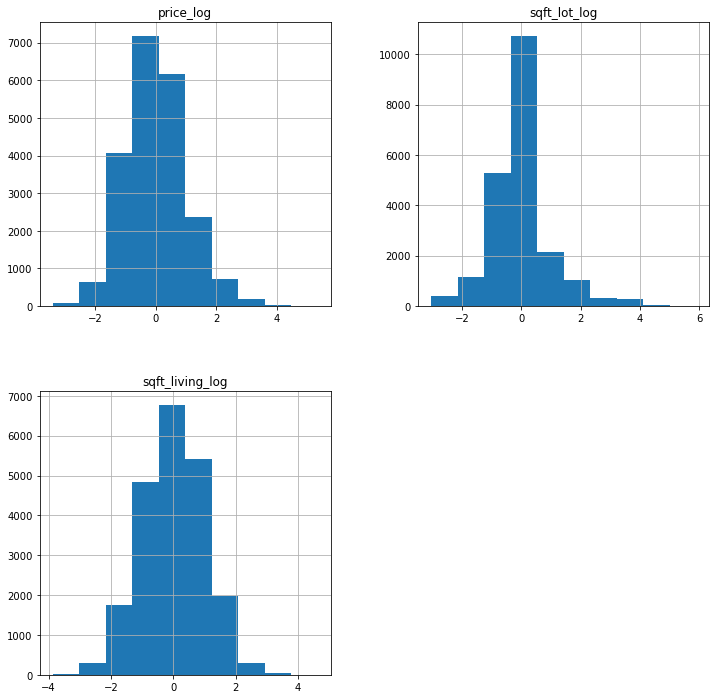

In [72]:
kc_log_norm.hist(figsize = [12,12])

In [ ]:
### check features with statsmodels ###

# OLS with Statsmodels #

In [73]:
from statsmodels.formula.api import ols
import scipy.stats as stats
import statsmodels.api as sm


In [ ]:
### ols for continuous features

In [74]:
outcome = 'price_log'
predictors = kc_log_norm.drop('price_log', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=kc_log_norm).fit()
model.summary()

### OLS Regression Results for continuous variables ####

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.463
Model:                            OLS   Adj. R-squared:                  0.463
Method:                 Least Squares   F-statistic:                     9231.
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:36:16   Log-Likelihood:                -23735.
No. Observations:               21420   AIC:                         4.748e+04
Df Residuals:                   21417   BIC:                         4.750e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept       -3.208e-15      0.005  -6.41e-13      1.000      -0.010       0.010
sqft_lot_log       -0.0918      0.005    -17.323      0.000      -0.102      -0.081
sqft_living_log     0.7048      0.005    133.024      0.000       0.694       0.715
==============================================================================
Omnibus:                       93.148   Durbin-Watson:                   1.988
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               90.864
Skew:                           0.142   Prob(JB):                     1.86e-20
Kurtosis:                       2.854   Cond. No.                         1.40
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
#### in the end, there is no significant difference between the Rsquared
#### values with or without bathroom #

# ------------ Categorical -------------- #

array([[<AxesSubplot:title={'center':'waterfront'}>,
        <AxesSubplot:title={'center':'condition'}>,
        <AxesSubplot:title={'center':'grade'}>],
       [<AxesSubplot:title={'center':'yr_built'}>,
        <AxesSubplot:title={'center':'bathrooms'}>,
        <AxesSubplot:title={'center':'floors'}>],
       [<AxesSubplot:title={'center':'bedrooms'}>, <AxesSubplot:>,
        <AxesSubplot:>]], dtype=object)

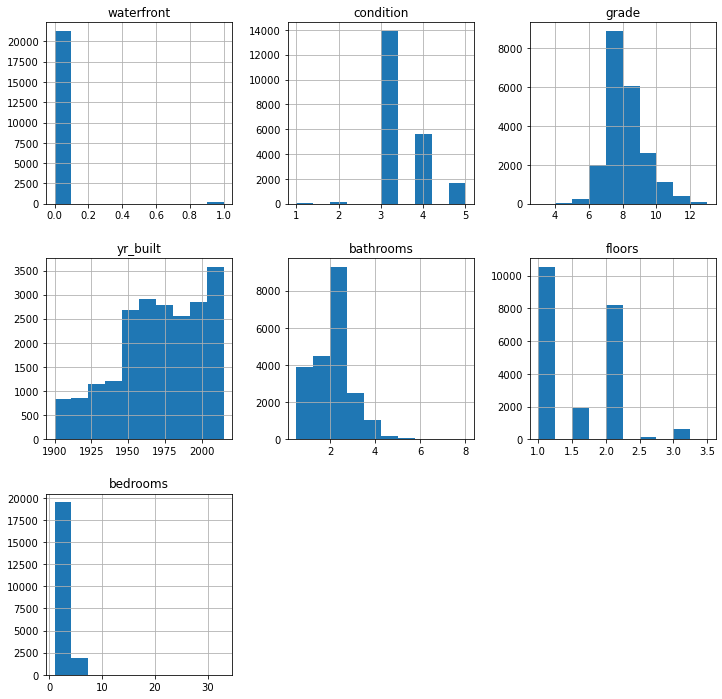

In [76]:
kccat.hist(figsize = [12,12])

In [ ]:
kccat.info()

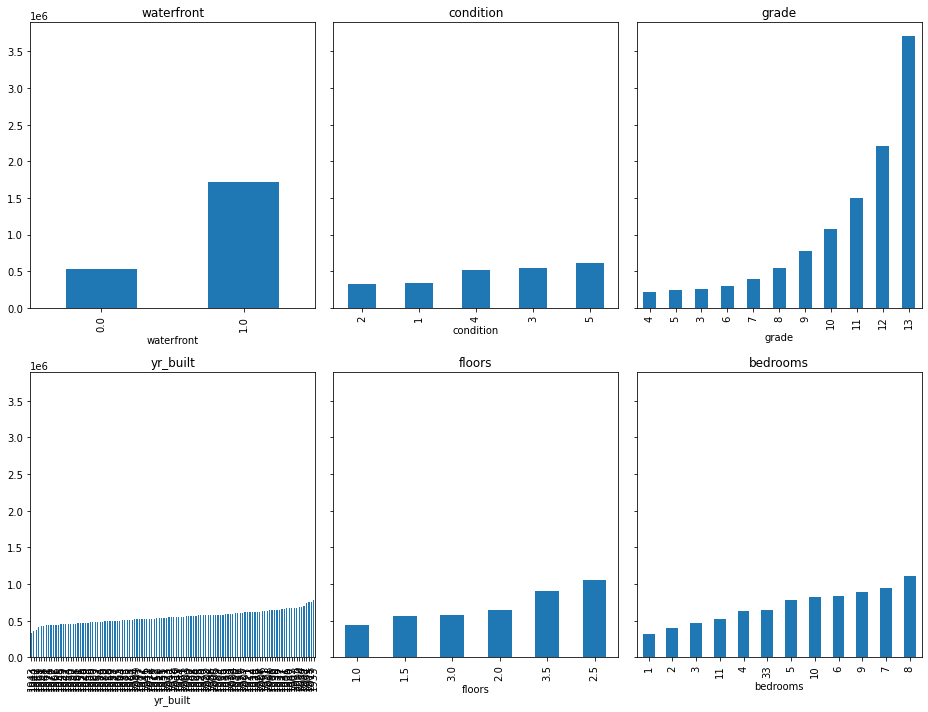

In [81]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(13,10), sharey=True)

categoricals = ['waterfront', 'condition', 'grade',  'yr_built', 'floors', 'bedrooms', 'bathrooms']

for col, ax in zip(categoricals, axes.flatten()):
    (kc_new.groupby(col)               # group values together by column of interest
         .mean()['price']        # take the mean of the saleprice for each group
         .sort_values()              # sort the groups in ascending order
         .plot
         .bar(ax=ax))                # create a bar graph on the ax
    
    ax.set_title(col)                # Make the title the name of the column
    
fig.tight_layout()

In [77]:
condition_ohe = pd.get_dummies(kccat['condition'], prefix = 'condition', drop_first=True)
waterfront_ohe =pd.get_dummies(kccat['waterfront'], prefix = 'waterfront', drop_first=True)
grade_ohe= pd.get_dummies(kccat['grade'], prefix = 'grade', drop_first=True)
floors_ohe = pd.get_dummies(kccat['floors'], prefix = 'floors', drop_first=True)
yr_ohe = pd.get_dummies(kccat['yr_built'], prefix = 'yr_built', drop_first=True)
bed_ohe = pd.get_dummies(kccat['bedrooms'], prefix = 'bedrooms', drop_first=True)
bath_ohe = pd.get_dummies(kccat['bathrooms'], prefix = 'bathrooms', drop_first=True)

In [78]:
ohe_concat = pd.concat([condition_ohe, waterfront_ohe, grade_ohe, floors_ohe, yr_ohe, bed_ohe, bath_ohe], axis = 1)


In [79]:
preprocessed = pd.concat([kc_log_norm, ohe_concat], axis=1)

In [80]:
preprocessed.columns = preprocessed.columns.str.replace('.','_')

In [81]:
outcome = 'price_log'
predictors = preprocessed.drop('price_log', axis=1)
pred_sum = '+'.join(predictors.columns)
formula = outcome + '~' + pred_sum
model = ols(formula=formula, data=preprocessed).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.669
Model:                            OLS   Adj. R-squared:                  0.667
Method:                 Least Squares   F-statistic:                     244.3
Date:                Sat, 26 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:37:21   Log-Likelihood:                -18543.
No. Observations:               21420   AIC:                         3.744e+04
Df Residuals:                   21243   BIC:                         3.885e+04
Df Model:                         176                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.8911      0.665     -1.339      0.181      -2.195       0.413
sqft_lot_log       -0.0309      0.005     -5.911      0.000      -0.041      -0.021
sqft_living_log     0.3674      0.009     41.003      0.000       0.350       0.385
condition_2        -0.0322      0.119     -0.270      0.787      -0.266       0.201
condition_3         0.2796      0.111      2.525      0.012       0.063       0.497
condition_4         0.3525      0.111      3.182      0.001       0.135       0.570
condition_5         0.4447      0.111      3.992      0.000       0.226       0.663
waterfront_1_0      1.0298      0.049     21.000      0.000       0.934       1.126
grade_4            -0.4406      0.593     -0.743      0.457      -1.602       0.721
grade_5            -0.3738      0.587     -0.637      0.524      -1.524       0.776
grade_6            -0.0209      0.586     -0.036      0.972      -1.170       1.128
grade_7             0.4794      0.586      0.818      0.414      -0.670       1.629
grade_8             0.9254      0.587      1.578      0.115      -0.224       2.075
grade_9             1.4092      0.587      2.402      0.016       0.259       2.559
grade_10            1.8025      0.587      3.071      0.002       0.652       2.953
grade_11            2.1751      0.588      3.701      0.000       1.023       3.327
grade_12            2.6231      0.591      4.440      0.000       1.465       3.781
grade_13            3.0658      0.615      4.987      0.000       1.861       4.271
floors_1_5          0.0028      0.017      0.170      0.865      -0.030       0.036
floors_2_0         -0.0023      0.014     -0.171      0.864      -0.029       0.024
floors_2_5          0.0217      0.048      0.452      0.651      -0.072       0.116
floors_3_0          0.2560      0.029      8.867      0.000       0.199       0.313
floors_3_5          0.2120      0.221      0.959      0.337      -0.221       0.645
yr_built_1901      -0.0272      0.124     -0.219      0.827      -0.271       0.217
yr_built_1902      -0.0679      0.128     -0.531      0.595      -0.318       0.183
yr_built_1903      -0.1962      0.106     -1.843      0.065      -0.405       0.012
yr_built_1904       0.0093      0.107      0.087      0.931      -0.201       0.220
yr_built_1905      -0.0369      0.092     -0.403      0.687      -0.217       0.143
yr_built_1906       0.0533      0.087      0.612      0.540      -0.117       0.224
yr_built_1907       0.0058      0.095      0.061      0.951      -0.181       0.192
yr_built_1908      -0.1658      0.088     -1.878      0.060      -0.339       0.007
yr_built_1909      -0.0275      0.086     -0.319      0.750      -0.197       0.142
yr_built_1910      -0.0894      0.080     -1.114      0.265      -0.247       0.068
yr_built_1911      -0.0320      0.092     -0.346      0.729

In [82]:
X = preprocessed.drop('price_log', axis=1)
y = preprocessed['price_log']

In [83]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y)
print(len(X_train), len(X_test), len(y_train), len(y_test))

16065 5355 16065 5355


In [84]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.model_selection import ShuffleSplit, cross_validate

splitter = ShuffleSplit(n_splits=3, test_size=0.20, random_state=0)
baseline_model = LinearRegression()

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_train,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

Train score:      0.6684559682716517
Validation score: -99424.65172613162


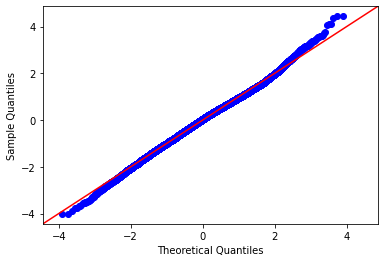

In [85]:
fig = sm.graphics.qqplot(model.resid, dist=stats.norm, line='45', fit=True)

In [86]:
import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ 
    Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded, dtype='float64')
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.idxmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [87]:
X = X_train
y = y_train

result = stepwise_selection(X, y, verbose = True)
print('resulting features:')
print(result)

Add  grade_6                        with p-value 0.0
Add  sqft_living_log                with p-value 0.0
Add  grade_7                        with p-value 7.59616e-185
Add  grade_8                        with p-value 1.49892e-166
Add  grade_5                        with p-value 2.36585e-131
Add  waterfront_1_0                 with p-value 2.09646e-110
Add  bathrooms_2_5                  with p-value 1.69266e-104
Add  grade_9                        with p-value 8.66974e-76
Add  condition_5                    with p-value 3.81821e-77
Add  floors_1_5                     with p-value 9.91185e-63
Add  bedrooms_2                     with p-value 4.65415e-64
Add  sqft_lot_log                   with p-value 8.57171e-52
Add  grade_4                        with p-value 1.35002e-34
Add  grade_10                       with p-value 1.30124e-37
Add  condition_4                    with p-value 7.62745e-38
Add  floors_2_0                     with p-value 5.4421e-16
Add  yr_built_1978                  

In [94]:
X_fin = X[result]
X_with_intercept = sm.add_constant(X_fin)
model = sm.OLS(y,X_with_intercept).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              price_log   R-squared:                       0.604
Model:                            OLS   Adj. R-squared:                  0.602
Method:                 Least Squares   F-statistic:                     246.0
Date:                Fri, 25 Feb 2022   Prob (F-statistic):               0.00
Time:                        19:11:42   Log-Likelihood:                -14554.
No. Observations:               15237   AIC:                         2.930e+04
Df Residuals:                   15142   BIC:                         3.002e+04
Df Model:                          94                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -1.6682      0.081    -20.676      0.000      -1.826      -1.510
grade_7             0.9176      0.053     17.195      0.000       0.813       1.022
sqft_living_log     0.3699      0.010     37.860      0.000       0.351       0.389
grade_6             0.3513      0.054      6.557      0.000       0.246       0.456
grade_8             1.4075      0.055     25.485      0.000       1.299       1.516
sqft_lot_log       -0.0529      0.007     -8.074      0.000      -0.066      -0.040
bathrooms_2_5      -0.0757      0.016     -4.723      0.000      -0.107      -0.044
condition_5         0.5289      0.064      8.248      0.000       0.403       0.655
bedrooms_2          0.1448      0.018      8.072      0.000       0.110       0.180
grade_10            2.3134      0.062     37.162      0.000       2.191       2.435
grade_11            2.6231      0.077     33.865      0.000       2.471       2.775
grade_9             1.9368      0.058     33.412      0.000       1.823       2.050
condition_4         0.4170      0.062      6.704      0.000       0.295       0.539
floors_2_0         -0.0665      0.015     -4.324      0.000      -0.097      -0.036
yr_built_1924       0.9978      0.066     15.176      0.000       0.869       1.127
yr_built_1978      -0.1757      0.039     -4.494      0.000      -0.252      -0.099
yr_built_1990      -0.2908      0.043     -6.783      0.000      -0.375      -0.207
yr_built_1926       0.8814      0.058     15.167      0.000       0.767       0.995
yr_built_1925       0.8689      0.059     14.686      0.000       0.753       0.985
yr_built_1906       1.0164      0.080     12.715      0.000       0.860       1.173
yr_built_1910       0.8658      0.066     13.093      0.000       0.736       0.995
yr_built_1927       0.9146      0.072     12.695      0.000       0.773       1.056
yr_built_1919       0.9498      0.081     11.694      0.000       0.791       1.109
yr_built_1923       0.9523      0.083     11.440      0.000       0.789       1.115
yr_built_1907       0.9617      0.090     10.691      0.000       0.785       1.138
yr_built_1952       0.6062      0.054     11.295      0.000       0.501       0.711
yr_built_1941       0.7070      0.059     12.016      0.000       0.592       0.822
yr_built_1916       0.9280      0.085     10.981      0.000       0.762       1.094
yr_built_1909       0.8612      0.082     10.466      0.000       0.700       1.022
yr_built_1946       0.7431      0.066     11.217      0.000       0.613       0.873
yr_built_1950       0.5594      0.048     11.632      0.000       0.465       0.654
yr_built_1951       0.5781      0.051     11.262      0.000       0.477       0.679
yr_built_1905       0.8568      0.085     10.040      0.000       0.690       1.024
yr_built_1940       0.6385      0.059     10.791      0.000

In [ ]:
splitter = ShuffleSplit(n_splits=5, test_size=0.25, random_state=0)

baseline_scores = cross_validate(
    estimator=baseline_model,
    X=X_fin,
    y=y_train,
    return_train_score=True,
    cv=splitter
)

print("Train score:     ", baseline_scores["train_score"].mean())
print("Validation score:", baseline_scores["test_score"].mean())

# Stepwise Feature Selection with Scikit #

In [50]:
from sklearn.feature_selection import RFE

linreg = LinearRegression()
selector = RFE(linreg, n_features_to_select = 100)
selector = selector.fit(X, y.values.ravel()) # convert y to 1d np array to prevent DataConversionWarning
selector.support_ 

array([False, False, False,  True,  True,  True,  True,  True,  True,
       False,  True,  True,  True,  True,  True,  True,  True, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False,  True, False,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,

In [51]:
selected_columns = X.columns[selector.support_ ]
linreg.fit(X[selected_columns],y)

LinearRegression()

In [52]:
yhat = linreg.predict(X[selected_columns])

In [53]:
SS_Residual = np.sum((y-yhat)**2)
SS_Total = np.sum((y-np.mean(y))**2)
r_squared = 1 - (float(SS_Residual))/SS_Total
adjusted_r_squared = 1 - (1-r_squared)*(len(y)-1)/(len(y)-X[selected_columns].shape[1]-1)

In [54]:
r_squared

0.6321997294720638

In [55]:
adjusted_r_squared

0.6298957939262863